<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_rnn(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) RNN (Recurrent Neural Network)

## 1.1 Vanilla RNN (SimpleRNN)

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb

이론적 내용은 위 링크의 __1.1 Vanilla RNN (SimpleRNN)__ 참고

### Modeling

__Keras__

```python
# RNN 층을 추가하는 코드
model.add(SimpleRNN(hidden_size))

# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))

# 다른 표기
model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))
```

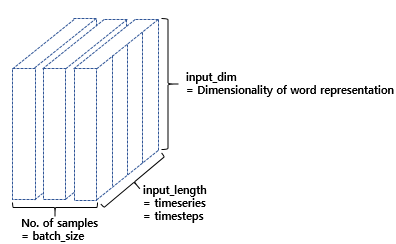

* hidden_size = 은닉 상태의 크기
 * 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와 동일
* timesteps(input_length) = 입력 시퀀스의 길이 (시점의 수)
* input_dim = 입력의 크기

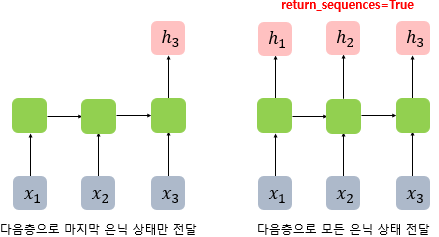

RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냄
* __(batch_size, output_dim)__ 크기의 2D 텐서 리턴 __(default)__
 * 메모리 셀의 최종 시점의 은닉 상태만을 리턴
 * many-to-one 문제를 푸는 경우
 
* __(batch_size, timesteps, output_dim)__ 크기의 3D 텐서 리턴
 * 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴
 * 이는 RNN 층의 __return_sequences 매개 변수를 True로 설정__하는 것으로 가능함
 * 다음층에 은닉층이 하나 더 있거나 many-to-many 문제를 푸는 경우
 
* output_dim은 RNN 층을 추가하는 코드에서 정의한 hidden_size의 값으로 설정



In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일

model.summary() # output_shape = (batch_size, output_dim)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# batch_size 설정
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))

model.summary() # output_shape = (batch_size, output_dim)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# return_sequences = True 설정
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))

model.summary() # output_shape = (batch_size, timesteps, output_dim)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


__Numpy__

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb

위 링크의 __1.1.1 Modeling - Numpy__ 참고

## 1.2 Deep Recurrent Neural Network

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb

이론적 내용은 위 링크의 __1.2 Deep Recurrent Neural Network__ 참고

### Modeling

```python
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))
```

## 1.3 Bidirectional Recurrent Neural Network

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb

이론적 내용은 위 링크의 __1.3 Bidirectional Recurrent Neural Network__ 참고

### Modeling

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
```

```python
# 깊은(deep) 양방향 순환 신경망
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
```

---
(ex) 모델 파라미터 개수 계산

1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100임
2. 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128임
3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정
4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용
5. 은닉층은 1개

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

vocab_size = 5000
embedding_dim = 100
hidden_size = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_size))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               29312     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________


* Embedding layer parameter 
 * 5,000(input) * 100(embedding) = __500,000__
* SimpleRNN layer parameter
 * $W_{x}$ : 100(embedding) * 128(hidden) = __12,800__
 * $W_{h}$ : 128(hidden) * 128(hidden) = __16,384__
 * $b$ : __128__
* Dense later parameter
 * $W_{y}$ : __128__
 * $b$ : __1__

__Total params : 529,441__

# 2) LSTM (Long Short-Term Memory)

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb

위 링크의 __2) LSTM (Long Short-Term Memory)__ 참고

__Modeling__

```python
model.add(LSTM(hidden_size, input_shape=(timesteps, input_dim)))
```

# 3) GRU (Gated Recurrent Unit)

* GRU는 LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄임
* LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재했던 반면, GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만 존재
* GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만 여러 평가에서 GRU는 LSTM과 비슷한 성능을 보인다고 알려져 있음
* 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고 알려져 있음

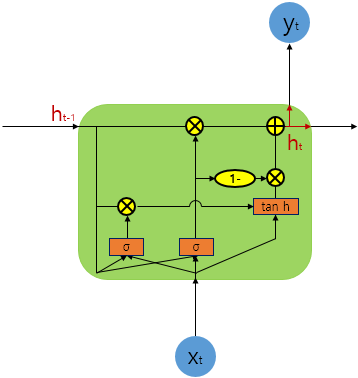

__Modeling__

```python
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))
```

# 4) Understanding SimpleRNN, LSTM (Keras)

## 4.1 SimpleRNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

In [ ]:
# 임의 입력값 생성
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], 
            [1.0, 3.1, 2.5, 0.7, 1.1], 
            [0.3, 2.1, 1.5, 2.1, 0.1], 
            [2.2, 1.4, 0.5, 0.9, 1.1]]]

train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


* (1, 4, 5) = (batch_size, timesteps, input_dim)
 * 배치 크기 : 1
 * 문장 길이(시점) : 4
 * 단어 벡터의 차원 : 5

생성한 데이터를 SimpleRNN의 입력으로 사용하여, SimpleRNN의 인자를 변경해보며 SimpleRNN의 출력값을 이해

In [ ]:
# return_sequences = False (default)
# return_state = False (default)

rnn = SimpleRNN(3)
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.6231625  -0.99032116  0.34390548]], shape: (1, 3)


* hidden_state_shape (1,3)  = (batch_size, hidden_size)
 * 마지막 시점의 은닉 상태 출력 (return_sequences = False)



In [ ]:
# return_sequences = True
# return_state = False (default)

rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.9999644   0.9416835  -0.90310335]
  [ 0.999677    0.9306366  -0.99055517]
  [ 0.95744574  0.90245265 -0.99096733]
  [ 0.9336872   0.4781613  -0.9879672 ]]], shape: (1, 4, 3)


* hidden_states_shape (1,4,3) = (batch_size, timesteps, hidden_size)
 * 모든 시점에 대해서 은닉 상태 출력 (return_sequences = True)

In [ ]:
# return_sequences = True
# return_state = True

rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.99038196 -0.9233116  -0.9858095 ]
  [-0.97785944 -0.8841236  -0.2799367 ]
  [-0.11661994  0.65023535 -0.77134675]
  [-0.39502034 -0.19131099  0.38752836]]], shape: (1, 4, 3)
last hidden state : [[-0.39502034 -0.19131099  0.38752836]], shape: (1, 3)


* hidden_states_shape (1,4,3) = (batch_size, timesteps, hidden_size)
* last hidden state_shape (1,3) =  (batch_size, hidden_size)
 * hidden_states와 last hidden_state, 즉 모든 시점에서의 은닉 상태와 마지막 시점의 은닉 상태 둘다 출력
 * ```return_sequences = True``` & ```return_state = True```

* hidden_states 출력 텐서의 마지막 벡터값과 last_state의 출력 벡터값이 일치하는 것을 확인할 수 있음


In [ ]:
# return_sequences = False (default)
# return_state = True

rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.9939383   0.8460623  -0.01765235]], shape: (1, 3)
last hidden state : [[-0.9939383   0.8460623  -0.01765235]], shape: (1, 3)


* hidden_state_shape (1,3) = (batch_size, hidden_size)
* last hidden state_shape (1,3) =  (batch_size, hidden_size)
 * hidden_states와 last hidden_state, 두 출력 모두 마지막 시점의 은닉 상태를 출력
 * ```return_sequences = False``` & ```return_state = True```

* 두 출력값이 같은 값임을 확인할 수 있음

## 4.2 LSTM

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM

In [3]:
# 임의 입력값 생성
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], 
            [1.0, 3.1, 2.5, 0.7, 1.1], 
            [0.3, 2.1, 1.5, 2.1, 0.1], 
            [2.2, 1.4, 0.5, 0.9, 1.1]]]

train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


In [4]:
# return_sequences = False
# return_state = True

lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.36307257 -0.00609374  0.56907445]], shape: (1, 3)
last hidden state : [[-0.36307257 -0.00609374  0.56907445]], shape: (1, 3)
last cell state : [[-1.052025   -0.01719148  1.0775939 ]], shape: (1, 3)


* hidden_state_shape (1,3) = (batch_size, hidden_size)
* last_hidden_state_shape (1,3) = (batch_size, hidden_size)
* last_cell_state_shape (1,3) = (batch_size, hidden_size)
 * 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환
 * ```return_state = True```

In [5]:
# return_sequences = True
# return_state = True

lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.6097138  -0.01573857  0.00753461]
  [ 0.6649874  -0.02187848  0.03097598]
  [ 0.5434932   0.00219236  0.07006836]
  [ 0.703211    0.039903    0.06404021]]], shape: (1, 4, 3)
last hidden state : [[0.703211   0.039903   0.06404021]], shape: (1, 3)
last cell state : [[1.3686848  0.08852859 0.5885756 ]], shape: (1, 3)


* hidden_states_shape (1,4,3) = (batch_size, timesteps, hidden_size)
 * 모든 시점의 은닉 상태 출력
 * ```return_sequences = True```
* last_hidden_state_shape (1,3) = (batch_size, hidden_size)
* last_cell_state_shape (1,3) = (batch_size, hidden_size)

## 4.3 Bidirectional LSTM

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional

In [10]:
# 임의 입력값 생성
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], 
            [1.0, 3.1, 2.5, 0.7, 1.1], 
            [0.3, 2.1, 1.5, 2.1, 0.1], 
            [2.2, 1.4, 0.5, 0.9, 1.1]]]

train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


In [8]:
k_init = tf.keras.initializers.Constant(value=0.1) 
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

* return_sequences가 True인 경우와 False인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서 출력되는 은닉 상태의 값을 고정

In [13]:
# return_sequences = False
# return_state = True

bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_state, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden state : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


* hidden_state_shape (1,6) = (batch_size, hidden_size * 2)
 * return_state가 True인 경우, 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태, 총 4가지를 반환
 * __정방향 LSTM의 마지막 시점의 은닉 상태__와 __역방향 LSTM의 첫번째 시점의 은닉 상태__가 연결된 채 반환
   * ```return_sequences = False```
* forward_state_shape (1,3) = (batch_size, hidden_size)
 * 정방향 LSTM의 마지막 시점의 은닉 상태
* backward_state_shape (1,3) = (batch_size, hidden_size)
 * 역방향 LSTM의 첫번째 시점의 은닉 상태

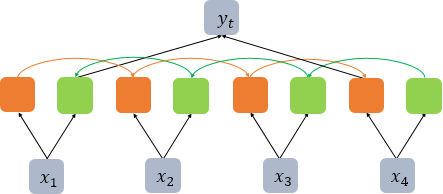

In [14]:
# return_sequences = True
# return_state = True

bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


* hidden_states_shape (1,4,6) = (batch_size, timesteps, hidden_size * 2)
 * 모든 시점의 은닉 상태 반환
 * 각 시점의 은닉상태는 __해당 시점에서의 정방향 LSTM의 은닉상태와 역방향 LSTM의 은닉상태가 연결된 값__
   * ```return_sequences = True```
* forward_state_shape (1,3) = (batch_size, hidden_size)
 * 정방향 LSTM의 마지막 시점의 은닉 상태
* backward_state_shape (1,3) = (batch_size, hidden_size)
 * 역방향 LSTM의 첫번째 시점의 은닉 상태

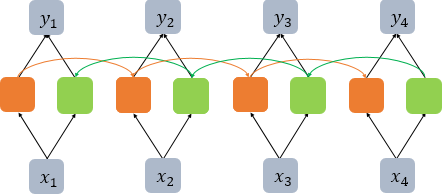